In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [2]:
dfp = pd.read_csv('predictions0.csv',sep=',', header=0, index_col=0, squeeze=True, parse_dates=True)
dfr = pd.read_csv('data2y.csv',sep=',', header=0, index_col=0, squeeze=True, parse_dates=True)

#dfr.drop(dfr.columns[[1]], axis=1, inplace=True)
#dfr['prs(m)'] = pd.to_numeric(dfr['prs(m)'], errors='coerce')
dfr['rad(m)'] = pd.to_numeric(dfr['prs(m)'], errors='coerce')
dfr.drop(dfr.columns[[0]], axis=1, inplace=True)

In [3]:
train_size = int(len(dfr) * 0.95)
test_size = len(dfr) - train_size
#60*24 daily ~ 1440 measurements
#changing the n_test, change the train size

#7 days for ALL = 60*24*7 = 10080
n_test = test_size


s=dfr.values

train , test1 = s[:-n_test], s[-n_test:]
print(len(train), len(test1))
n_test = 60*24*1
test = test1[:n_test]
print(len(test))

#timesteps for predictions
predictions= dfp.values
#test = test.values
pred_index= dfr.index[-n_test:]

985138 51850
1440


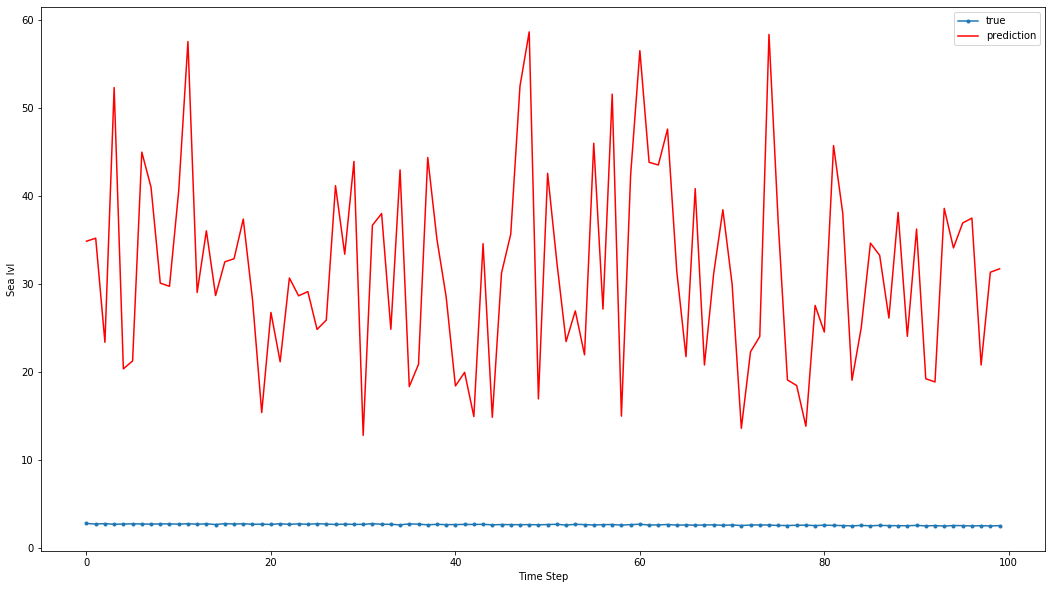

In [5]:
start = 0
end = 100
plt.rcParams["figure.figsize"] = (18,10)
plt.plot(test[start:end] , marker='.', label="true")
plt.plot(predictions[start:end], 'r', label="prediction")
plt.ylabel('Sea lvl')
plt.xlabel('Time Step')
plt.legend()
plt.show();